In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [7]:
zf = zipfile.ZipFile('/data/apartments.zip')
apartments = pd.read_csv(zf.open('Wohnungen100m.csv'), delimiter=',', encoding="cp1252")

In [8]:
apartments

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26865E43357,CRS3035RES100mN2686500E4335700,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26865E43357,CRS3035RES100mN2686500E4335700,HEIZTYP,4,Zentralheizung,3,0
2,100mN26865E43357,CRS3035RES100mN2686500E4335700,WOHNEIGENTUM,99,Trifft nicht zu (da keine Eigentumswohnung),3,0
3,100mN26865E43357,CRS3035RES100mN2686500E4335700,ZAHLWOHNGN_HHG,1,1 Wohnung,3,0
4,100mN26891E43370,CRS3035RES100mN2689100E4337000,INSGESAMT,0,Einheiten insgesamt,3,0
...,...,...,...,...,...,...,...
51342612,100mN35476E42201,CRS3035RES100mN3547600E4220100,WOHNEIGENTUM,1,Privatperson/-en,3,0
51342613,100mN35476E42201,CRS3035RES100mN3547600E4220100,WOHNEIGENTUM,99,Trifft nicht zu (da keine Eigentumswohnung),4,0
51342614,100mN35476E42201,CRS3035RES100mN3547600E4220100,WOHNFLAECHE_10S,8,90 - 99,3,0
51342615,100mN35476E42201,CRS3035RES100mN3547600E4220100,WOHNFLAECHE_10S,10,110 - 119,3,0


In [4]:
#read excel
translations = pd.read_excel('Data_Format_Census.xlsx', sheet_name='Translations')


In [5]:
translations

,Original,Translated
0,Merkmal,NaN
1,Auspraegung_Text,NaN
2,INSGESAMT,TOTAL
3,Einheiten insgesamt,Total
4,FAMTYP_KIND,FAMTYPE_CHILDREN
...,...,...
206,1 Wohnung,1 apartment
207,2 Wohnungen,2 apartments
208,3 - 6 Wohnungen,3 - 6 apartments
209,7 - 12 Wohnungen,7 - 12 apartments


In [6]:
#tansfrom to dictionary with original as key and translation as value
translation_dict = translations.set_index('Original')['Translated'].to_dict()
#translations_dict = dict(zip(translations['Original'], translations['Translated']))

In [7]:
pivot_df = apartments.pivot(index='Gitter_ID_100m',columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

In [8]:
pivot_df

Merkmal                    INSGESAMT        HEIZTYP  \
Auspraegung_Text Einheiten insgesamt Zentralheizung   
Gitter_ID_100m                                        
100mN26865E43357                 3.0            3.0   
100mN26891E43370                 3.0            NaN   
100mN26912E43412                 3.0            3.0   
100mN26917E43411                 5.0            5.0   
100mN26923E43411                 5.0            5.0   
...                              ...            ...   
100mN35475E42201                19.0           13.0   
100mN35476E42198                27.0           24.0   
100mN35476E42199                17.0           13.0   
100mN35476E42200                 5.0            4.0   
100mN35476E42201                 6.0            3.0   

Merkmal                                         WOHNEIGENTUM ZAHLWOHNGN_HHG  \
Auspraegung_Text Trifft nicht zu (da keine Eigentumswohnung)      1 Wohnung   
Gitter_ID_100m                                                                
100mN26865E43357                                         3.0            3.0   
100mN26891E43370                                         3.0            NaN   
100mN26912E43412                                         NaN            NaN   
100mN26917E43411                                         NaN            NaN   
100mN26923E43411                                         5.0            NaN   
...                                                      ...            ...   
100mN35475E42201                                        12.0            8.0   
100mN35476E42198                                         3.0            NaN   
100mN35476E42199                                        12.0            NaN   
100mN35476E42200                                         4.0            3.0   
100mN35476E42201                                         4.0            4.0   

Merkmal           BAUJAHR_MZ     GEBTYPBAUWEISE      GEBTYPGROESSE  \
Auspraegung_Text 1949 - 1978 Anderer Gebäudetyp Anderer Gebäudetyp   
Gitter_ID_100m                                                       
100mN26865E43357         NaN                NaN                NaN   
100mN26891E43370         3.0                3.0                3.0   
100mN26912E43412         NaN                NaN                NaN   
100mN26917E43411         3.0                NaN                NaN   
100mN26923E43411         NaN                NaN                NaN   
...                      ...                ...                ...   
100mN35475E42201        15.0                NaN                NaN   
100mN35476E42198        24.0                NaN                NaN   
100mN35476E42199        14.0                NaN                NaN   
100mN35476E42200         3.0                NaN                NaN   
100mN35476E42201         5.0                NaN                NaN   

Merkmal                               NUTZUNG_DETAIL_HHGEN BAUJAHR_MZ  \
Auspraegung_Text Vermietet: mit aktuell geführtem Haushalt   Vor 1919   
Gitter_ID_100m                                                          
100mN26865E43357                                       NaN        NaN   
100mN26891E43370                                       3.0        NaN   
100mN26912E43412                                       NaN        3.0   
100mN26917E43411                                       3.0        NaN   
100mN26923E43411                                       NaN        NaN   
...                                                    ...        ...   
100mN35475E42201                                       5.0        NaN   
100mN35476E42198                                       NaN        NaN   
100mN35476E42199                                       8.0        NaN   
100mN35476E42200                                       NaN        NaN   
100mN35476E42201                                       NaN        NaN   

Merkmal                        GEBAEUDEART_SYS  ... WOHNFLAECHE_10S            \
Auspraegung_Text Sonstige Gebäude mit

instead of replacing nan with 0, exclude these cells

In [9]:
#rename columns with trtanslation_dict
pivot_df = pivot_df.rename(columns=translation_dict)

In [10]:
pivot_df    

Merkmal          TOTAL       HEAT_TYPE  \
Auspraegung_Text Total Central heating   
Gitter_ID_100m                           
100mN26865E43357   3.0             3.0   
100mN26891E43370   3.0             NaN   
100mN26912E43412   3.0             3.0   
100mN26917E43411   5.0             5.0   
100mN26923E43411   5.0             5.0   
...                ...             ...   
100mN35475E42201  19.0            13.0   
100mN35476E42198  27.0            24.0   
100mN35476E42199  17.0            13.0   
100mN35476E42200   5.0             4.0   
100mN35476E42201   6.0             3.0   

Merkmal                                                   OWNERSHIP_TYPE1  \
Auspraegung_Text Does not apply (as it is not a owner-occupied apartment)   
Gitter_ID_100m                                                              
100mN26865E43357                                                3.0         
100mN26891E43370                                                3.0         
100mN26912E43412                                                NaN         
100mN26917E43411                                                NaN         
100mN26923E43411                                                5.0         
...                                                             ...         
100mN35475E42201                                               12.0         
100mN35476E42198                                                3.0         
100mN35476E42199                                               12.0         
100mN35476E42200                                                4.0         
100mN35476E42201                                                4.0         

Merkmal          APARTMENT_NO BUILDING_YEAR      BUILDING_TYPE2  \
Auspraegung_Text  1 apartment   1949 - 1978 Other building type   
Gitter_ID_100m                                                    
100mN26865E43357          3.0           NaN                 NaN   
100mN26891E43370          NaN           3.0                 3.0   
100mN26912E43412          NaN           NaN                 NaN   
100mN26917E43411          NaN           3.0                 NaN   
100mN26923E43411          NaN           NaN                 NaN   
...                       ...           ...                 ...   
100mN35475E42201          8.0          15.0                 NaN   
100mN35476E42198          NaN          24.0                 NaN   
100mN35476E42199          NaN          14.0                 NaN   
100mN35476E42200          3.0           3.0                 NaN   
100mN35476E42201          4.0           5.0                 NaN   

Merkmal                BUILDING_SIZE                     NUTZUNG_DETAIL_HHGEN  \
Auspraegung_Text Other building type Rented: with currently managed household   
Gitter_ID_100m                                                                  
100mN26865E43357                 NaN                                      NaN   
100mN26891E43370                 3.0                                      3.0   
100mN26912E43412                 NaN                                      NaN   
100mN26917E43411                 NaN                                      3.0   
100mN26923E43411                 NaN                                      NaN   
...                              ...                                      ...   
100mN35475E42201                 NaN                                      5.0   
100mN35476E42198                 NaN                                      NaN   
100mN35476E42199                 NaN                                      8.0   
100mN35476E42200                 NaN                                      NaN   
100mN35476E42201                 NaN                                      NaN   

Merkmal          BUILDING_YEAR                BUILDING_TYPE1  ... FLOOR_SPACE  \
Auspraegung_Text   Before 1919 Sonstige Gebäude mit Wohnraum  ...   130 - 139   
Gitter_ID_100m                                                ...               
100mN26865E4335

In [11]:
#print unique columns
print(pivot_df.columns.get_level_values(0).unique())

Index(['TOTAL', 'HEAT_TYPE', 'OWNERSHIP_TYPE1', 'APARTMENT_NO',
       'BUILDING_YEAR', 'BUILDING_TYPE2', 'BUILDING_SIZE',
       'NUTZUNG_DETAIL_HHGEN', 'BUILDING_TYPE1', 'OWNERSHIP_TYPE2', 'ROOM_NO',
       'FLOOR_SPACE'],
      dtype='object', name='Merkmal')


In [22]:
#rename column
pivot_df = pivot_df.rename(columns={'NUTZUNG_DETAIL_HHGEN': 'USE_TYPE'})

In [12]:
total = pivot_df['TOTAL']['Total'].sum()

In [13]:
pivot_df[['TOTAL','HEAT_TYPE']]

Merkmal          TOTAL       HEAT_TYPE                                      \
Auspraegung_Text Total Central heating District heating (district heating)   
Gitter_ID_100m                                                               
100mN26865E43357   3.0             3.0                                 NaN   
100mN26891E43370   3.0             NaN                                 NaN   
100mN26912E43412   3.0             3.0                                 NaN   
100mN26917E43411   5.0             5.0                                 NaN   
100mN26923E43411   5.0             5.0                                 NaN   
...                ...             ...                                 ...   
100mN35475E42201  19.0            13.0                                 NaN   
100mN35476E42198  27.0            24.0                                 NaN   
100mN35476E42199  17.0            13.0                                 NaN   
100mN35476E42200   5.0             4.0                                 NaN   
100mN35476E42201   6.0             3.0                                 NaN   

Merkmal                                                                  \
Auspraegung_Text Single/multi-room heaters (also night storage heaters)   
Gitter_ID_100m                                                            
100mN26865E43357                                                NaN       
100mN26891E43370                                                NaN       
100mN26912E43412                                                NaN       
100mN26917E43411                                                NaN       
100mN26923E43411                                                NaN       
...                                                             ...       
100mN35475E42201                                                NaN       
100mN35476E42198                                                NaN       
100mN35476E42199                                                NaN       
100mN35476E42200                                                NaN       
100mN35476E42201                                                NaN       

Merkmal                                                           \
Auspraegung_Text No heating in the building or in the apartments   
Gitter_ID_100m                                                     
100mN26865E43357                                             NaN   
100mN26891E43370                                             NaN   
100mN26912E43412                                             NaN   
100mN26917E43411                                             NaN   
100mN26923E43411                                             NaN   
...                                                          ...   
100mN35475E42201                                             NaN   
100mN35476E42198                                             NaN   
100mN35476E42199                                             NaN   
100mN35476E42200                                             NaN   
100mN35476E42201                                             NaN   

Merkmal                                       
Auspraegung_Text Block heating Floor heating  
Gitter_ID_100m                                
100mN26865E43357           NaN           NaN  
100mN26891E43370           NaN           NaN  
100mN26912E43412           NaN           NaN  
100mN26917E43411           NaN           NaN  
100mN26923E43411           NaN           NaN  
...                        ...           ...  
100mN35475E42201           NaN           NaN  
100mN35476E42198           NaN           NaN  
100mN35476E42199           NaN           3.0  
100mN35476E42200           NaN           NaN  
100mN35476E42201           NaN           NaN  

[2737253 rows x 7 columns]

In [28]:

pivot_df['HEAT_TYPE_DC'] = pivot_df['HEAT_TYPE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['OWNERSHIP_TYPE1_DC'] = pivot_df['OWNERSHIP_TYPE1'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['APARTMENT_NO_DC'] = pivot_df['APARTMENT_NO'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_YEAR_DC'] = pivot_df['BUILDING_YEAR'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_TYPE2_DC'] = pivot_df['BUILDING_TYPE2'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_SIZE_DC'] = pivot_df['BUILDING_SIZE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['USE_TYPE_DC'] = pivot_df['USE_TYPE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_TYPE1_DC'] = pivot_df['BUILDING_TYPE1'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['OWNERSHIP_TYPE2_DC'] = pivot_df['OWNERSHIP_TYPE2'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['ROOM_NO_DC'] = pivot_df['ROOM_NO'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['FLOOR_SPACE_DC'] = pivot_df['FLOOR_SPACE'].sum(axis=1) / pivot_df['TOTAL']['Total']


In [24]:
pivot_df[['TOTAL', 'HEAT_TYPE', 'HEAT_TYPE_DC']]

Merkmal          TOTAL       HEAT_TYPE                                      \
Auspraegung_Text Total Central heating District heating (district heating)   
Gitter_ID_100m                                                               
100mN26865E43357   3.0             3.0                                 NaN   
100mN26891E43370   3.0             NaN                                 NaN   
100mN26912E43412   3.0             3.0                                 NaN   
100mN26917E43411   5.0             5.0                                 NaN   
100mN26923E43411   5.0             5.0                                 NaN   
...                ...             ...                                 ...   
100mN35475E42201  19.0            13.0                                 NaN   
100mN35476E42198  27.0            24.0                                 NaN   
100mN35476E42199  17.0            13.0                                 NaN   
100mN35476E42200   5.0             4.0                                 NaN   
100mN35476E42201   6.0             3.0                                 NaN   

Merkmal                                                                  \
Auspraegung_Text Single/multi-room heaters (also night storage heaters)   
Gitter_ID_100m                                                            
100mN26865E43357                                                NaN       
100mN26891E43370                                                NaN       
100mN26912E43412                                                NaN       
100mN26917E43411                                                NaN       
100mN26923E43411                                                NaN       
...                                                             ...       
100mN35475E42201                                                NaN       
100mN35476E42198                                                NaN       
100mN35476E42199                                                NaN       
100mN35476E42200                                                NaN       
100mN35476E42201                                                NaN       

Merkmal                                                           \
Auspraegung_Text No heating in the building or in the apartments   
Gitter_ID_100m                                                     
100mN26865E43357                                             NaN   
100mN26891E43370                                             NaN   
100mN26912E43412                                             NaN   
100mN26917E43411                                             NaN   
100mN26923E43411                                             NaN   
...                                                          ...   
100mN35475E42201                                             NaN   
100mN35476E42198                                             NaN   
100mN35476E42199                                             NaN   
100mN35476E42200                                             NaN   
100mN35476E42201                                             NaN   

Merkmal                                      HEAT_TYPE_DC  
Auspraegung_Text Block heating Floor heating               
Gitter_ID_100m                                             
100mN26865E43357           NaN           NaN     1.000000  
100mN26891E43370           NaN           NaN     0.000000  
100mN26912E43412           NaN           NaN     1.000000  
100mN26917E43411           NaN           NaN     1.000000  
100mN26923E43411           NaN           NaN     1.000000  
...                        ...           ...          ...  
100mN35475E42201           NaN           NaN     0.684211  
100mN35476E42198           NaN           NaN     0.888889  
100mN35476E42199           NaN           3.0     0.941176  
100mN35476E42200           NaN           NaN     0.800000  
100mN35476E42201           NaN           NaN     0.500000  

[2737253 rows x 8 columns]

In [25]:
heat = pivot_df['HEAT_TYPE'].sum().sum()
ownership1 = pivot_df['OWNERSHIP_TYPE1'].sum().sum()
apt_no = pivot_df['APARTMENT_NO'].sum().sum()
build_year = pivot_df['BUILDING_YEAR'].sum().sum()
build_type2 = pivot_df['BUILDING_TYPE2'].sum().sum()
build_size = pivot_df['BUILDING_SIZE'].sum().sum()
use_type = pivot_df['USE_TYPE'].sum().sum()
build_type1 = pivot_df['BUILDING_TYPE1'].sum().sum()
ownership2 = pivot_df['OWNERSHIP_TYPE2'].sum().sum()
room_no = pivot_df['ROOM_NO'].sum().sum()
floor_space = pivot_df['FLOOR_SPACE'].sum().sum()



In [26]:
print('heat:', heat/total*100)
print('ownership1:', ownership1/total*100)
print('apt_no:', apt_no/total*100)
print('build_year:', build_year/total*100)
print('build_type2:', build_type2/total*100)
print('build_size:', build_size/total*100)
print('use_type:', use_type/total*100)
print('build_type1:', build_type1/total*100)
print('ownership2:', ownership2/total*100)
print('room_no:', room_no/total*100)
print('floor_space:', floor_space/total*100)



heat: 94.38621192233963
ownership1: 98.59210710608008
apt_no: 99.2470826326408
build_year: 86.49774962535065
build_type2: 96.56215860485968
build_size: 95.58420253329709
use_type: 96.20772543409271
build_type1: 99.5298538830968
ownership2: 95.38488607891169
room_no: 92.12944264930944
floor_space: 77.69926793703715


C:\Users\annak\AppData\Local\Temp\ipykernel_12604\2524477105.py:100: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


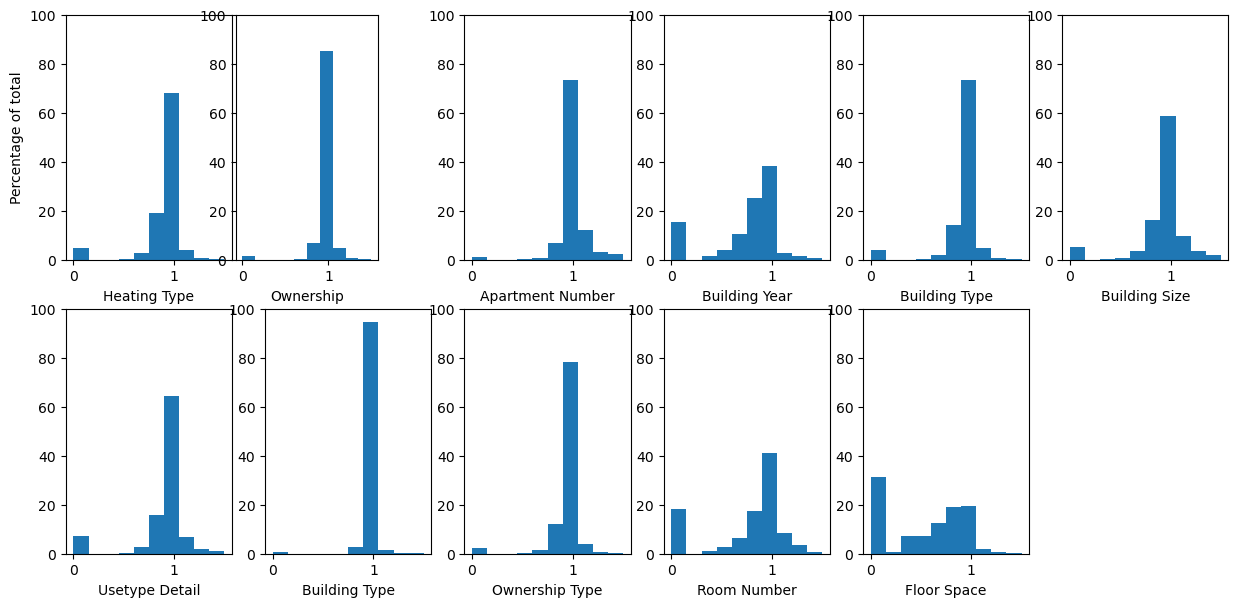

In [29]:
data1 = pivot_df['HEAT_TYPE_DC']
data2 = pivot_df['OWNERSHIP_TYPE1_DC']
data3 = pivot_df['APARTMENT_NO_DC']
data4 = pivot_df['BUILDING_YEAR_DC']
data5 = pivot_df['BUILDING_TYPE2_DC']
data6 = pivot_df['BUILDING_SIZE_DC']
data7 = pivot_df['USE_TYPE_DC']
data8 = pivot_df['BUILDING_TYPE1_DC']
data9 = pivot_df['OWNERSHIP_TYPE2_DC']
data10 = pivot_df['ROOM_NO_DC']
data11 = pivot_df['FLOOR_SPACE_DC']



counts1, bins1 = np.histogram(data1)
counts1 = counts1/counts1.sum()*100

counts2, bins2 = np.histogram(data2)
counts2 = counts2/counts2.sum()*100

counts3, bins3 = np.histogram(data3)
counts3 = counts3/counts3.sum()*100

counts4, bins4 = np.histogram(data4)
counts4 = counts4/counts4.sum()*100

counts5, bins5 = np.histogram(data5)
counts5 = counts5/counts5.sum()*100

counts6, bins6 = np.histogram(data6)
counts6 = counts6/counts6.sum()*100

counts7, bins7 = np.histogram(data7)
counts7 = counts7/counts7.sum()*100

counts8, bins8 = np.histogram(data8)
counts8 = counts8/counts8.sum()*100

counts9, bins9 = np.histogram(data9)
counts9 = counts9/counts9.sum()*100

counts10, bins10 = np.histogram(data10)
counts10 = counts10/counts10.sum()*100

counts11, bins11 = np.histogram(data11)
counts11 = counts11/counts11.sum()*100




plt.figure(figsize=(15,7))
plt.subplot(2,6,1)
plt.hist(bins1[:-1], bins1, weights=counts1)
plt.xlabel('Heating Type')
plt.ylabel('Percentage of total')
plt.ylim(0,100)
plt.subplot(2,7,2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.xlabel('Ownership')
plt.ylim(0,100)
plt.subplot(2,6,3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.xlabel('Apartment Number')
plt.ylim(0,100)
plt.subplot(2,6,4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.xlabel('Building Year')
plt.ylim(0,100)
plt.subplot(2,6,5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.xlabel('Building Type')
plt.ylim(0,100)
plt.subplot(2,6,6)
plt.hist(bins6[:-1], bins6, weights=counts6)
plt.xlabel('Building Size')
plt.ylim(0,100)
plt.subplot(2,6,7)
plt.hist(bins7[:-1], bins7, weights=counts7)
plt.xlabel('Usetype Detail')
plt.ylim(0,100)
plt.subplot(2,6,8)
plt.hist(bins8[:-1], bins8, weights=counts8)
plt.xlabel('Building Type')
plt.ylim(0,100)
plt.subplot(2,6,9)
plt.hist(bins9[:-1], bins9, weights=counts9)
plt.xlabel('Ownership Type')
plt.ylim(0,100)
plt.subplot(2,6,10)
plt.hist(bins10[:-1], bins10, weights=counts10)
plt.xlabel('Room Number')
plt.ylim(0,100)
plt.subplot(2,6,11)
plt.hist(bins11[:-1], bins11, weights=counts11)
plt.xlabel('Floor Space')
plt.ylim(0,100)



plt.tight_layout()


plt.show()



In [30]:
pivot_df.to_csv('Apartments100m_pivot.csv', sep=',', encoding="cp1252")